In [79]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve

print(" Libraries imported successfully.")


 Libraries imported successfully.


In [80]:
#  Load Dataset

# Replace 'breast_cancer.csv' with your actual filename
data = pd.read_csv("E:/data (2).csv")

# Check columns
print("Columns:", data.columns)


Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [81]:
#  Drop unnecessary columns

# Drop 'id' and empty 'Unnamed: 32' if they exist
data = data.drop(['id', 'Unnamed: 32'], axis=1)

print(" Dropped unneeded columns. Remaining columns:\n", data.columns)


 Dropped unneeded columns. Remaining columns:
 Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [82]:
#  Define Features and Target

# Target
y = data['diagnosis']

# Encode target: M=1, B=0
le = LabelEncoder()
y = le.fit_transform(y)
print("Target classes encoded as:", le.classes_)  # ['B', 'M']

# Features
X = data.drop('diagnosis', axis=1)


Target classes encoded as: ['B' 'M']


In [83]:
#  Check for missing values

print("Any NaN in X?", X.isnull().values.any())
print("Any NaN in y?", pd.isnull(y).any())


Any NaN in X? False
Any NaN in y? False


In [84]:
#  Impute missing values if any (optional)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print("Missing values imputed if any.")


Missing values imputed if any.


In [85]:
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (455, 30)
Testing set shape: (114, 30)


In [87]:
#  Standardize Features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features standardized.")


 Features standardized.


In [88]:
# Train Logistic Regression Model

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

print(" Logistic Regression model trained successfully.")


 Logistic Regression model trained successfully.


In [89]:
#  Make Predictions

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [90]:
#  Evaluation Metrics

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix:\n", cm)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


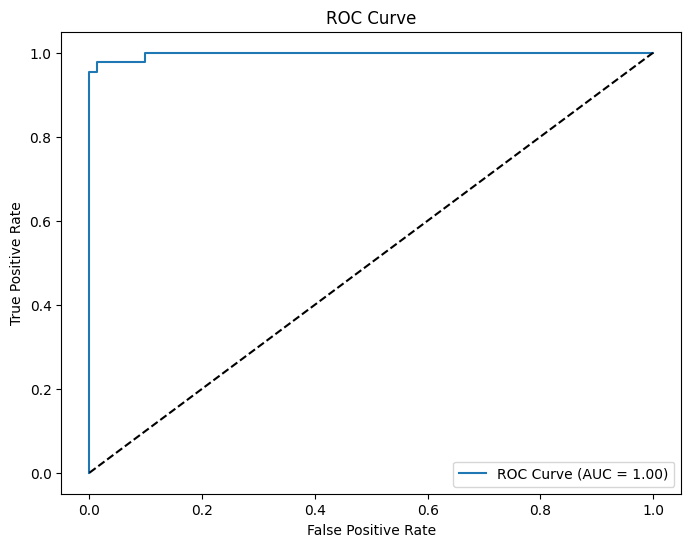

In [91]:
#  Plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


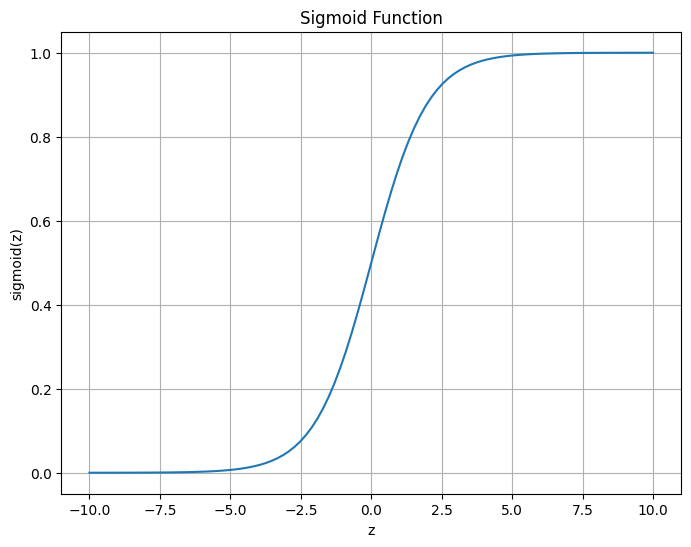

In [92]:
#  Plot Sigmoid Function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.figure(figsize=(8,6))
plt.plot(x_vals, y_vals)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()


In [93]:
#  Task Completed
print(" Logistic Regression classification pipeline executed successfully.")


 Logistic Regression classification pipeline executed successfully.
